<a href="https://colab.research.google.com/github/dikshithakalva/IIIT-H/blob/main/Mod_5_Lab_1_Linear_Regression%2C_MSE_and_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import linear_model,metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import math

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

## Regression Lab 1: Linear Regression, MSE and Polynomial Regression

Multiple linear regression is an extension of simple linear regression that involves more than one predictor (independent variable) to predict a single outcome (dependent variable). The fundamental idea remains the same—predicting a target variable based on input features—yet with multiple predictors rather than just one.

Linear regression is a technique that is used to model a linear relationship between some data $x$ and its corresponding output $y$. When there are multiple inputs ($x_1, x_2, .. , x_n$), it is referred to as **Mutliple Linear Regression**.

Essentially, we model the relationship as $y = mx + c$. Linear regression attempts to find the $m$ and $c$ values.

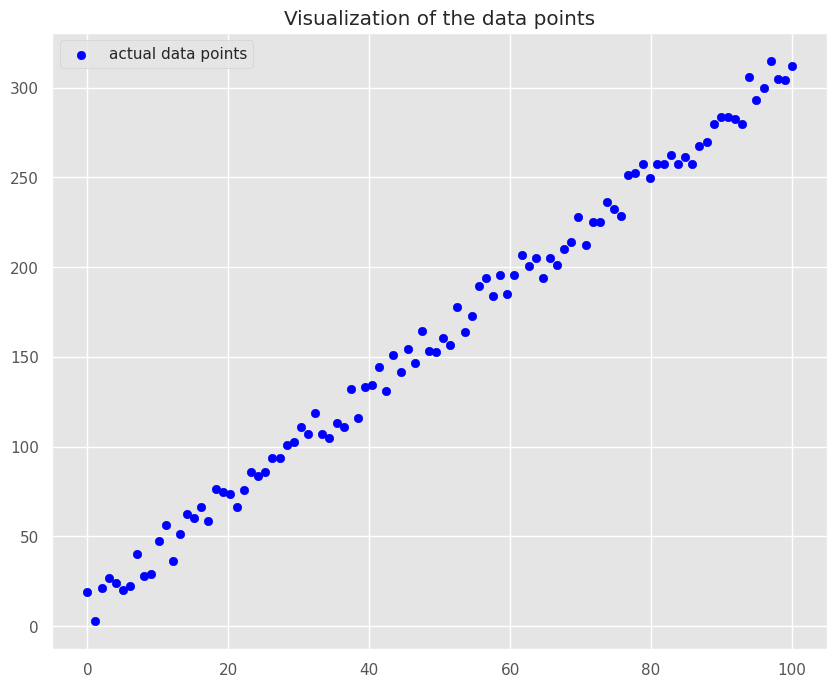

In [ ]:
# generating random data points and adding noise

np.random.seed(10)

x = np.linspace(0,100,100).reshape((-1,1))
y = (np.random.rand(100)*25).astype(int).reshape((-1,1)) + 3*x

plt.title("Visualization of the data points")
plt.scatter(x,y,color="blue")
plt.legend(["actual data points"])
plt.show()


### **Brute force solution**
Naive approach to finding the values of m and c (the slope and y-intercept of a linear regression line) involves exhaustively searching through a range of possible values for
m and c and selecting the line that minimizes the average distance (often measured as the sum or average of squared differences) between the predicted values from the line and the actual data points.

In [ ]:
# brute-force solution of rotating line and searching through space of lines for best fit

for m in range(-2,6):
  for c in range(-5,5):
    py = (m*x + c).reshape((-1,1))

    plt.plot(x,py,color="red")
    plt.scatter(x,y,color="blue")
    plt.show()

    print("Average distance: {}\n".format(np.mean(np.sqrt((y-py)**2))))

the graphs, the best solution from the brute-force method doesn't seem too bad. In fact, an average distance of 6 isn't bad at all! But, there's one obvious drawback to this approach: it's very inefficient. The search space for the given data may be low, but that is not always the case. Additionally, this approach doesn't guarantee the best possible values. Unless we make the $\delta m$ and $\delta c$ very infinitesimally small (which would make this solution extremely slow), the "best" value obtained may not even be close to the best possible value. So, how do we fix this issue? We turn to a technique called **linear regression**.   

In [ ]:
def lin_regression(x,y):

  # learning the coefficient and intercept

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  print("The coefficient is: {} and the intercept is: {}\n".format(m1.coef_[0][0],m1.intercept_[0]))

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)

  # plotting data and predictions

  plt.title("Visualization of actual data vs predicted outputs")
  plt.scatter(x,y,color="blue")
  plt.plot(x_test,y_pred,color="red")
  plt.legend(["predicted line","actual data points"])
  plt.show()

  print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))

  # plot training line and test points

  lin_regression(x,y)

In [ ]:
lin_regression(x,y)


The main goal of linear regression (or regression in general) is to minimize the **error** of the model. Typically, **mean squared error (MSE)** is used as the error term.

Suppose we have some data $x$ and outputs $y$. Now, we obtain some predictions $y_p$ for $x$ using our linear regression model.
The mean squared error is then defined as:

$E = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

intuitively, we can think of it as a distance between the actual value and the predicted value. By giving our regression model "feedback" on how far it is, it eventually learns the correct relationship between $x$ and $y$. So, the model tries to learn the values of $m$ and $c$ for which the equation $y=mx +c$ has the least error.

## The need for polynomial regression

The drawback with linear regression is that it tries to model a linear relationship between $x$ and $y$. More often than not, data does cannot be modelled by a linear equation. Let's look at an example of how linear regression falls short.
1. **Assumption of Linearity:** Linear regression assumes a linear relationship between the dependent and independent variables, which might not hold true in all real-world scenarios, limiting its applicability.
   
2. **Vulnerability to Outliers:** Outliers can significantly impact the estimated coefficients and overall model performance in linear regression, making it sensitive to extreme values within the dataset.

In [ ]:
# simple polynomial with noise

y2 = (np.random.randint(-1000,1000,x.shape)).astype(int).reshape((-1,1)) + 3*x**2
plt.scatter(x,y2,color="blue")
plt.show()

In [ ]:
# POLYNOMIAL REGRESSION

def poly_regression(x,y,deg):

  x = x.reshape((-1,1))
  y = y.reshape((-1,1))

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = linear_model.LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)

  mse = np.sqrt(metrics.mean_squared_error(y_pred,y))

  plt.plot(x,y_pred,color="red")
  plt.title("Visualization of actual data vs predicted outputs (polynomial regression)")
  plt.scatter(x,y,color="blue")
  plt.legend(["predicted polynomial","actual data points"])
  plt.show()

  print("The RMSE for polynomial regression is: {}".format(mse))

In [ ]:
lin_regression(x,y2)

poly_regression(x,y2,2)

Polynomial regression is a type of regression analysis used in statistics to model and analyze relationships between a dependent variable and one or more independent variables. While linear regression fits a linear relationship between the variables, polynomial regression extends this concept by using a polynomial equation to fit the data.



In [ ]:
# Read the raw data into a DataFrame, skipping the first 22 rows and specifying the separator
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Extract the relevant data and target values
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DataFrame from the extracted data
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(data, columns=column_names)

# Add a new column 'MEDV' to the DataFrame and assign the 'target' values to it
df['MEDV'] = target

# Now you have a DataFrame 'df' containing the Boston Housing Prices dataset with the 'MEDV' column.

1. CRIM: Per capita crime rate by town
2. ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
3. INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4. NOX: Nitric oxide concentration (parts per 10 million)
5. RM: Average number of rooms per dwelling
6. AGE: Proportion of owner-occupied units built prior to 1940
7. DIS: Weighted distances to five Boston employment centers
8. RAD: Index of accessibility to radial highways
9. TAX: Full-value property tax rate per \$10,000
10. PTRATIO: Pupil-teacher ratio by town
11. B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
12. LSTAT: Percentage of lower status of the population
13. MEDV: Median value of owner-occupied homes in $1000s

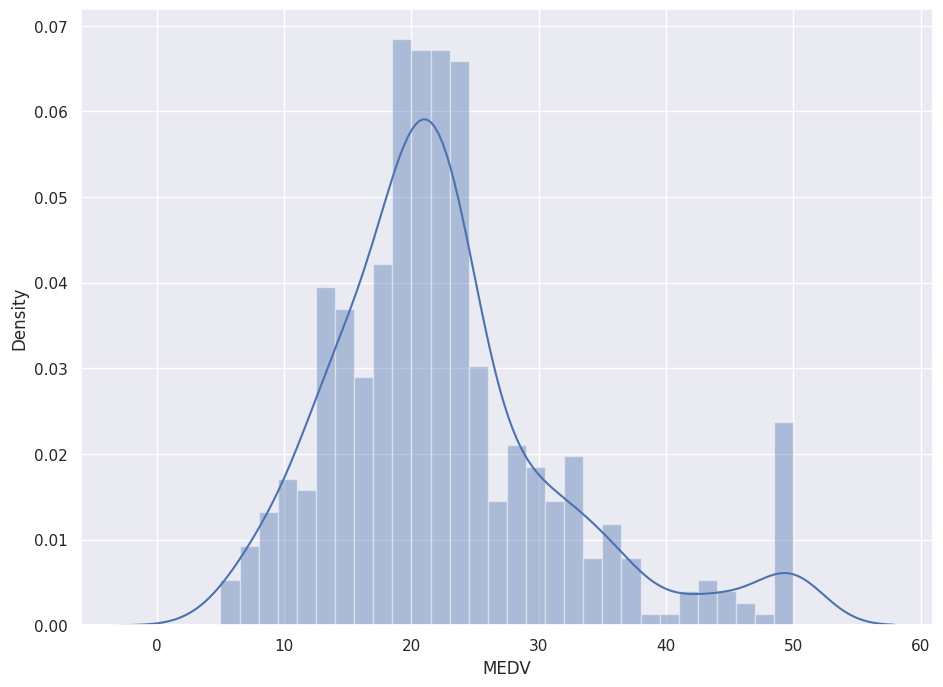

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

To gain a deeper insight into the linear connections between the features and the target value (MEDV), which seemingly follows a normal distribution with added noise, employing a correlation matrix would be beneficial. Visualizing this correlation matrix through a heatmap provides a clear and organized representation of these relationships.

<Axes: >

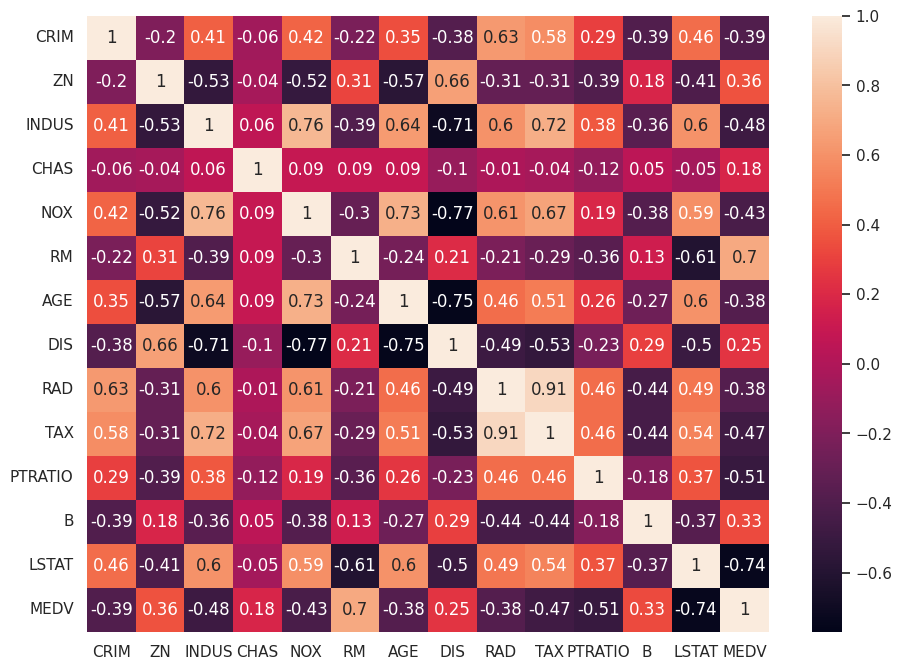

In [ ]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

From the plot, we see that RM has a high positive correlation with MEDV (0.7). Similarly, LSTAT has a high negative correlation with MEDV (-0.74). So, pick those as the features with which we train our regression model.

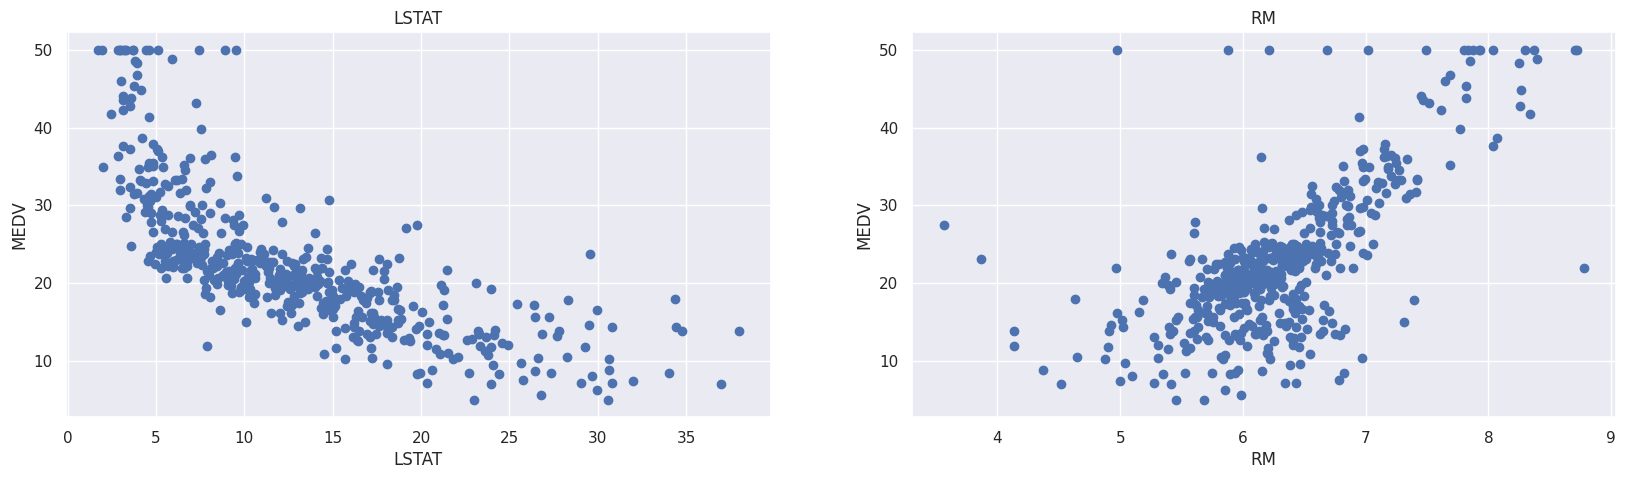

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

The two plots that the relationship between MEDV and the selected features resembles a linear relationship.

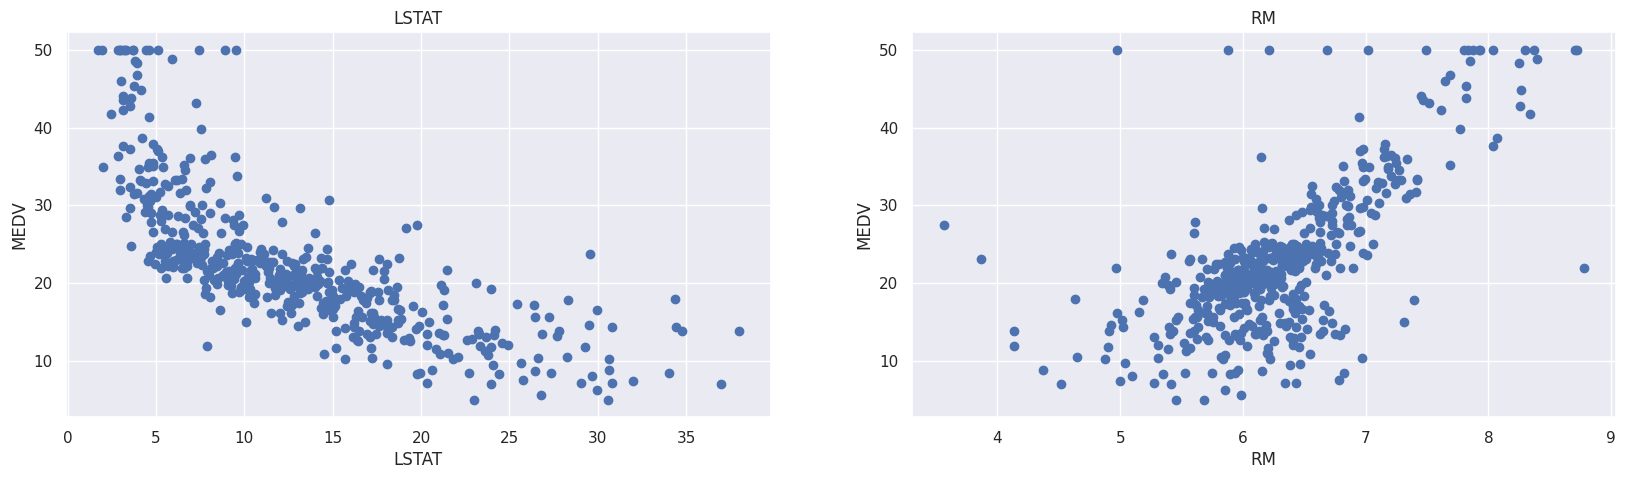

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [40]:
x_ex = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
y_ex = df['MEDV']

x_ex_train, x_ex_test, y_ex_train, y_ex_test = train_test_split(x_ex, y_ex, test_size = 0.2, random_state=5)

lin_model = linear_model.LinearRegression()
lin_model.fit(x_ex_train, y_ex_train)

LinearRegression()

In [41]:
y_ex_train_predict = lin_model.predict(x_ex_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_train, y_ex_train_predict)))
r2 = metrics.r2_score(y_ex_train, y_ex_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_ex_test_predict = lin_model.predict(x_ex_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_test, y_ex_test_predict)))
r2 = metrics.r2_score(y_ex_test, y_ex_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 5.637129335071195

Model performance for testing set
--------------------------------------
RMSE is 5.137400784702911


## **Exercise**

We have seen a graph of a linear regression model attempting to represent polynomial data, and how it falls short when trying to model non-linear data. Now, what if we took some non-linear noisy data, and fit a very high degree polynomial to it?


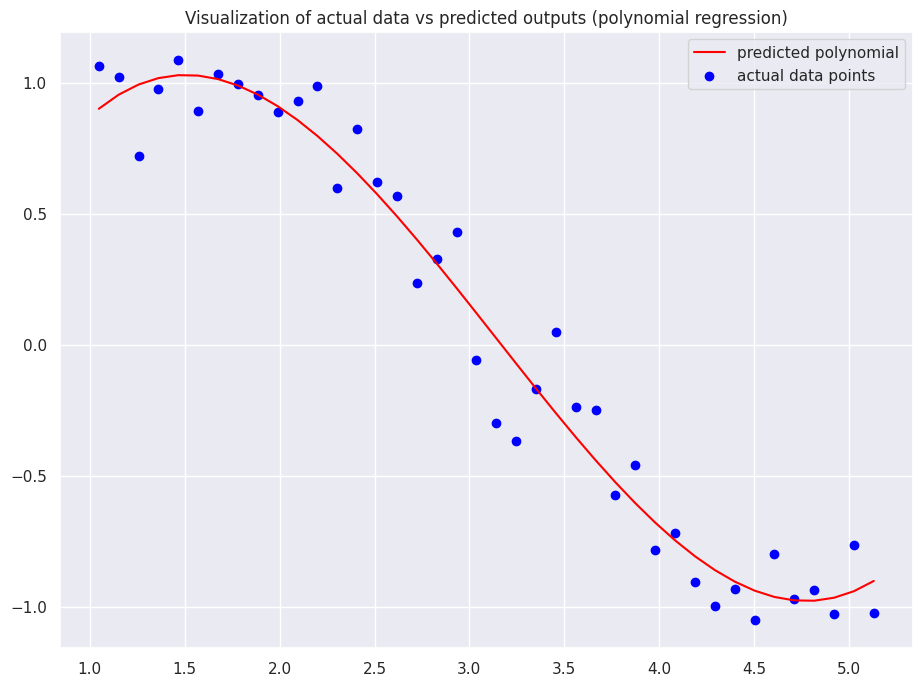

The RMSE for polynomial regression is: 0.1435668698141603


In [ ]:
deg = 3#@param {type:"slider", min: 1, max:15, step:1}

np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,6)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.15,len(x_ex))
poly_regression(x_ex,y_ex,deg)

Fitting a very high degree polynomial to non-linear noisy data can lead to overfitting, which means the model might capture the noise in the data rather than the underlying true pattern. While high-degree polynomials can theoretically fit complex patterns, they are prone to excessively following data fluctuations, resulting in poor generalization to new, unseen data.

Overfitting: High-degree polynomials have many parameters, allowing them to closely follow the data points, including the noise. This can lead to poor performance when applied to new data as the model might not generalize well beyond the training set.
